In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

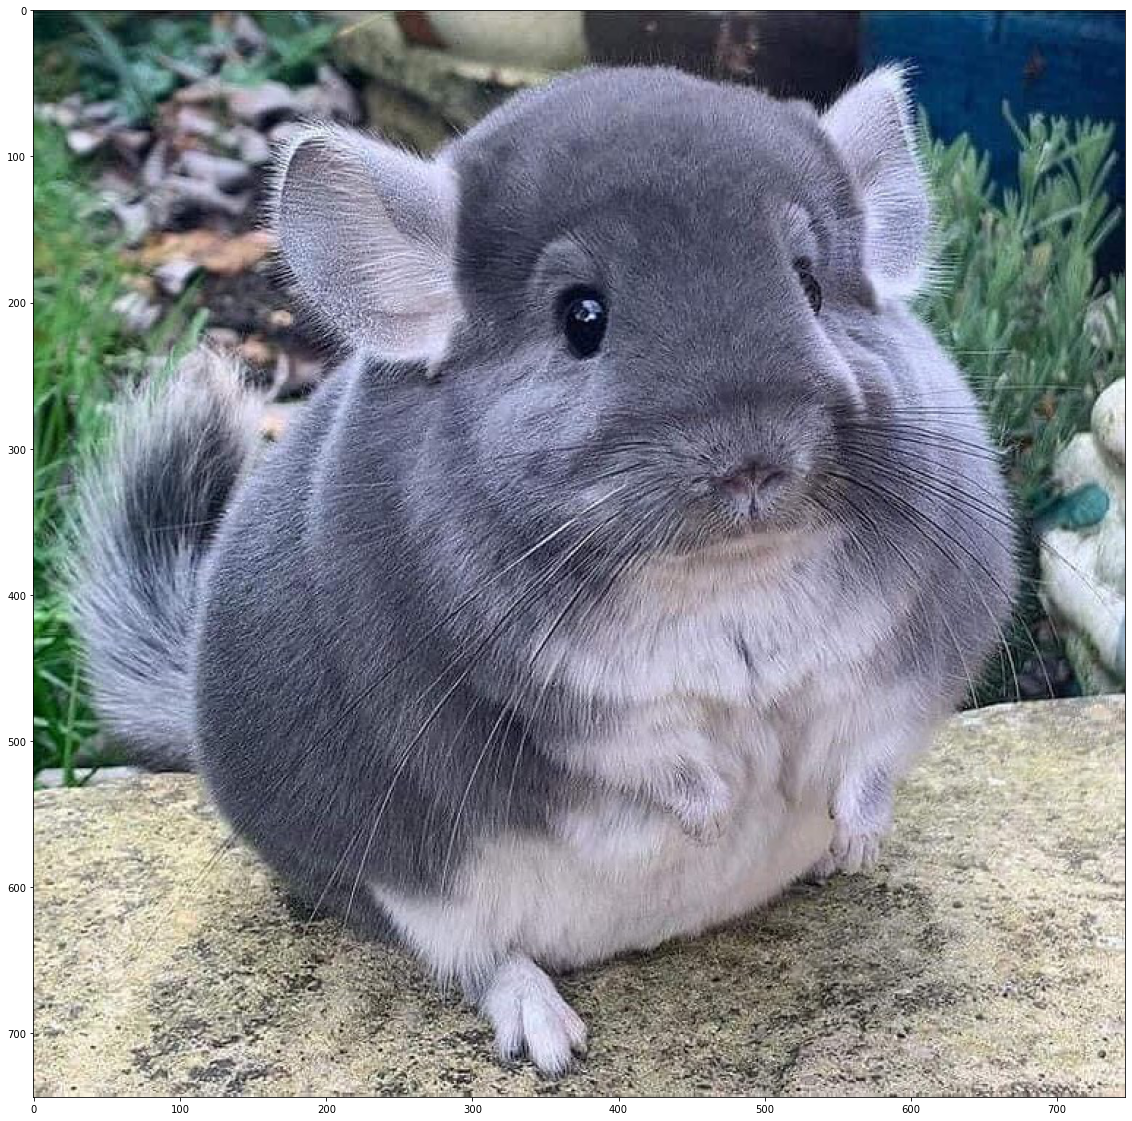

In [2]:
new_image = imread("chinchilla.jpg")

plt.figure(figsize=(20,20))
plt.imshow(new_image)

In [4]:
new_image = new_image/255.0
new_image.shape

(744, 747, 3)

In [5]:
X = new_image.reshape(-1,3)
X.shape

(555768, 3)

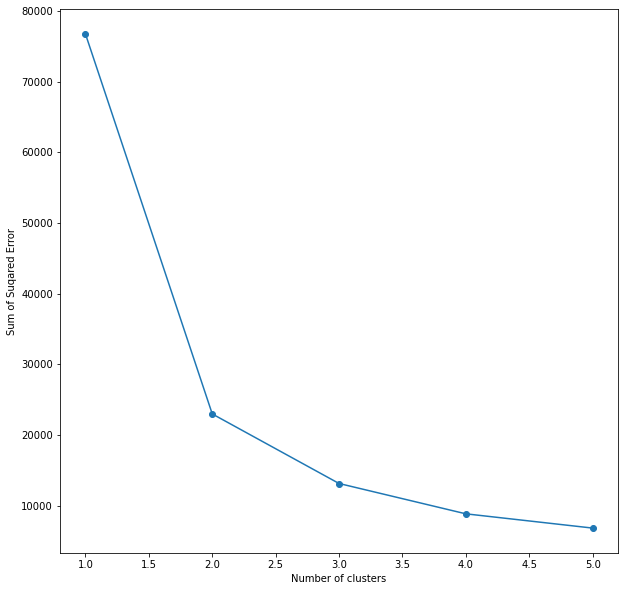

In [6]:
k_clusters = list(range(1,6))
sse = []

for k in k_clusters:
  km = KMeans(n_clusters=k)
  km.fit(X)
  sse.append(km.inertia_)

plt.figure(figsize=(10,10))
plt.plot(k_clusters, sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Suqared Error')
plt.show()

In [7]:
km_new = KMeans(n_clusters=2)
km_new.fit(X)

img_seg = km_new.cluster_centers_
print(img_seg)

[[0.30164947 0.33611712 0.36859941]
 [0.68768777 0.68524797 0.71015955]]


In [8]:
img_seg = img_seg[km_new.labels_]
img_seg = img_seg.reshape(new_image.shape)

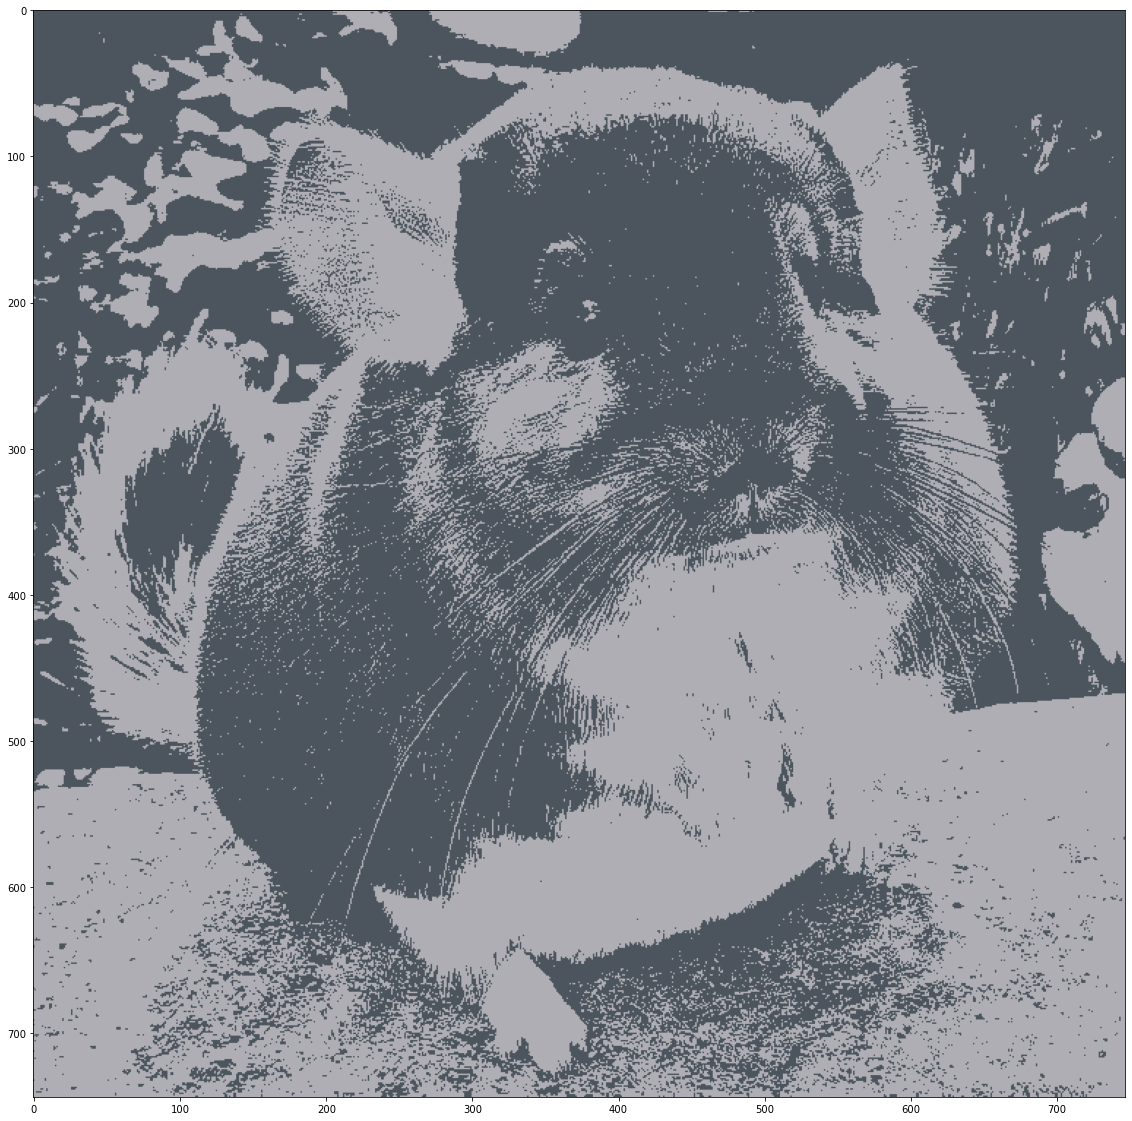

In [9]:
plt.figure(figsize=(20,20))
plt.imshow(img_seg)

In [ ]:
# Silhouette Analysis
import numpy as np 
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([2,3,4]):
  fig, ax = plt.subplots()
  fig.set_size_inches(18,18)

  km = KMeans(n_clusters=k, random_state = 0, max_iter = 50, n_init=10, verbose=1)
  labels = km.fit_predict(X)
  centroids = km.cluster_centers_
  
  silhouette_val = silhouette_samples(X, labels)

  # Silhouette plot
  y_ticks = []
  y_lower, y_upper = 0, 0
  for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_val[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

  avg_score = np.mean(silhouette_val)
  ax.axvline(avg_score, linestyle='--', linewidth=2, color='green')
  ax.set_yticks([])
  ax.set_xlim([-0.1, 1])
  ax.set_xlabel('Silhouette coefficient values')
  ax.set_ylabel('Cluster labels')
  ax.set_title('Silhouette plot for the various clusters', y=1.02);